###*Sayantan Mukherjee 60009220131 IPCV Mini-Project*

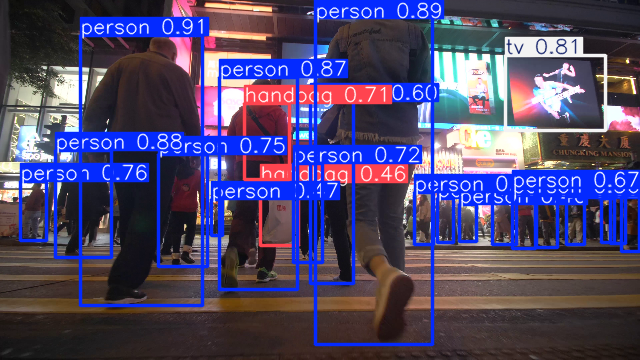

In [ ]:
!pip install ultralytics

# Import YOLO from ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
from IPython.display import display, clear_output
from PIL import Image

# Load a pretrained YOLOv5 model
model = YOLO('yolov5s.pt')

# Define a function to process video frames and display in Colab
def process_video(video_path, max_frames=100, skip_frames=5):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while cap.isOpened() and frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1

        # Skip frames to reduce load
        if frame_count % skip_frames != 0:
            continue

        frame = cv2.resize(frame, (640, 360))  # Resize to 640x360 for faster processing

        # Perform inference on the frame
        results = model(frame)

        # Visualize results on the frame
        annotated_frame = results[0].plot()

        #Frame converted from BGR in cv2 to RGB in PIL
        annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(annotated_frame_rgb)

        # Clear previous output and display the frame
        clear_output(wait=True)
        display(pil_img)

    cap.release()

video_path = '/content/8051_pedestrians_pedestrian_foot_traffic_18030109AKowloStreets33.mp4'
process_video(video_path, max_frames=264, skip_frames=5)


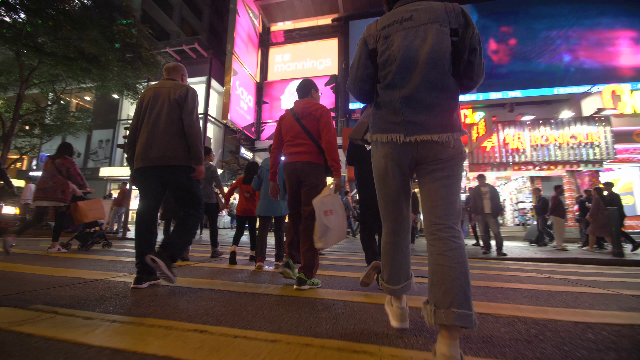

In [ ]:
import cv2
from PIL import Image
from IPython.display import clear_output, display
from ultralytics import YOLO

model = YOLO('yolov5s.pt')
multi_tracker = cv2.legacy.MultiTracker_create()

def process_video_with_cleaner_tracking(video_path, max_frames=100, skip_frames=5, confidence_threshold=0.5, max_objects=10):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    while cap.isOpened() and frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1

        if frame_count % skip_frames != 0:
            continue

        frame_resized = cv2.resize(frame, (640, 360))
        results = model(frame_resized)
        detections = [d for d in results[0].boxes if d.conf[0] > confidence_threshold]

        success, boxes = multi_tracker.update(frame_resized)

        for i, newbox in enumerate(boxes[:max_objects]):
            x, y, w, h = [int(v) for v in newbox]
            cv2.rectangle(frame_resized, (x, y), (x + w, y + h), (0, 255, 0), 1)
            cv2.putText(frame_resized, f'ID {i}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)

        for detection in detections[:max_objects]:
            x1, y1, x2, y2 = [int(v) for v in detection.xyxy[0]]
            multi_tracker.add(cv2.legacy.TrackerKCF_create(), frame_resized, (x1, y1, x2 - x1, y2 - y1))

        annotated_frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(annotated_frame_rgb)

        clear_output(wait=True)
        display(pil_img)

    cap.release()

video_path = '/content/8051_pedestrians_pedestrian_foot_traffic_18030109AKowloStreets33.mp4'
process_video_with_cleaner_tracking(video_path, max_frames=100, skip_frames=5, confidence_threshold=0.5, max_objects=10)


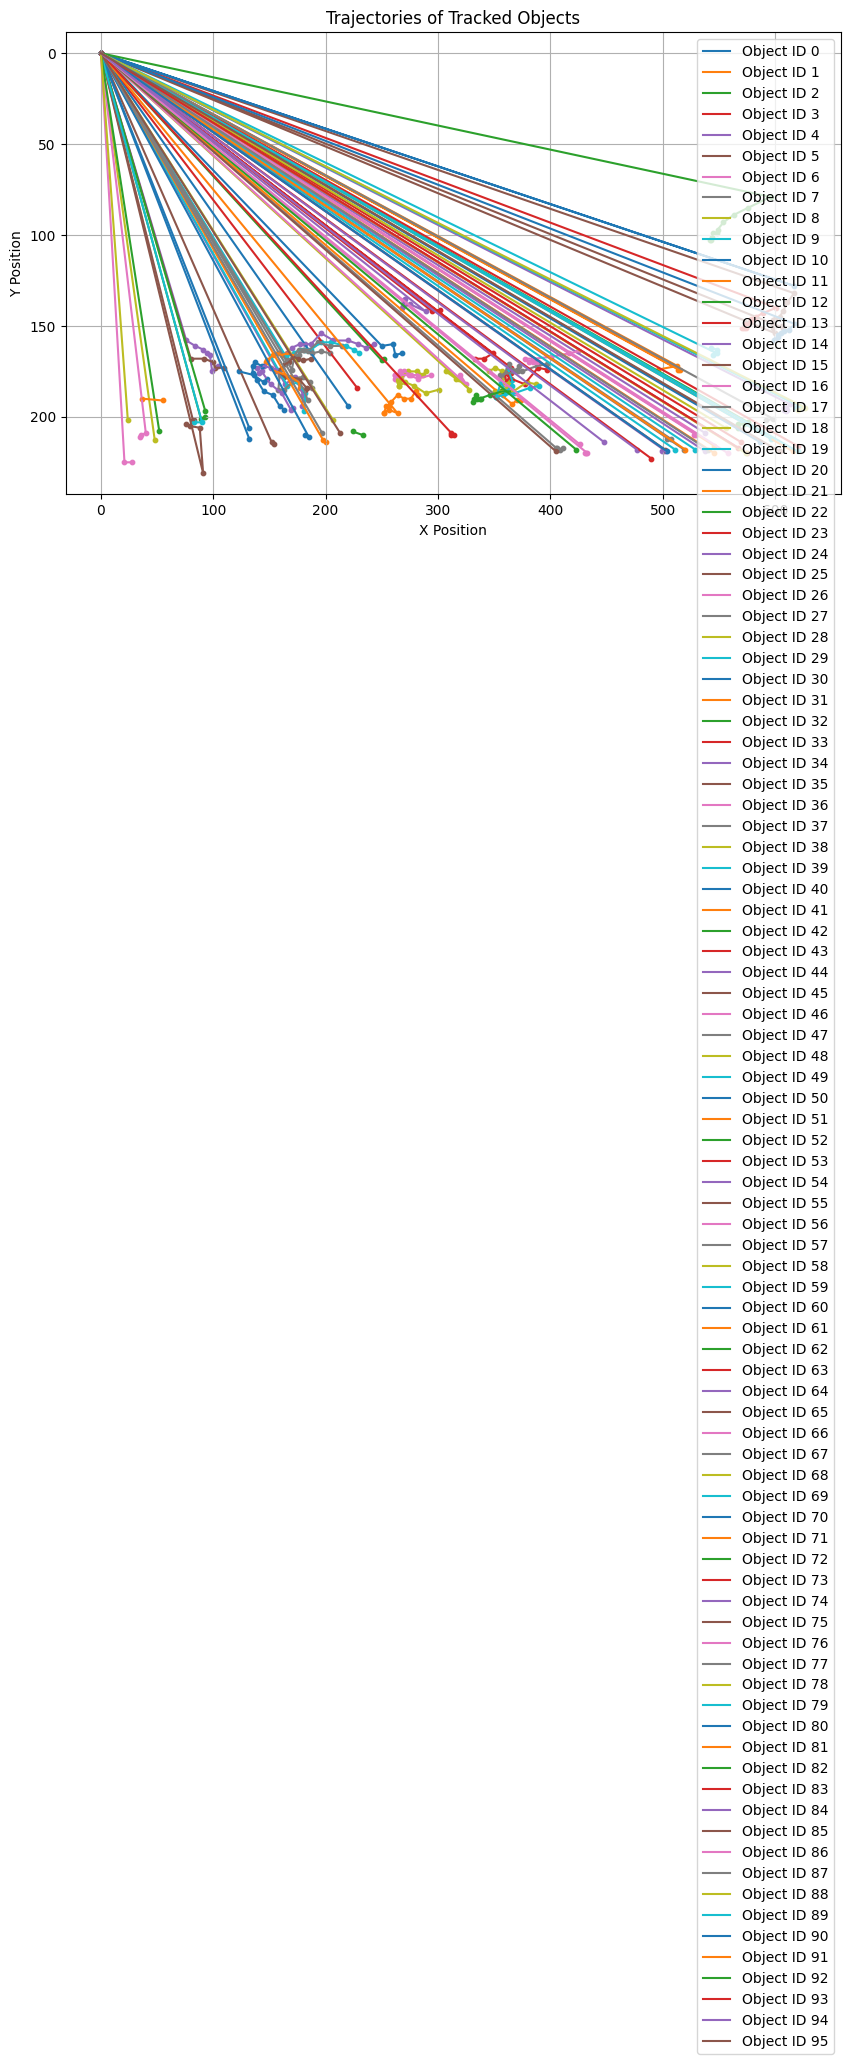

In [ ]:
import matplotlib.pyplot as plt

# Function to plot trajectories of each object ID
def plot_trajectories(trajectory_dict):
    plt.figure(figsize=(10, 6))

    for obj_id, trajectory in trajectory_dict.items():
        if len(trajectory) > 1:
            # Unpack the x and y coordinates for each trajectory
            x_coords = [point[0] for point in trajectory]
            y_coords = [point[1] for point in trajectory]
            plt.plot(x_coords, y_coords, label=f'Object ID {obj_id}')
            plt.scatter(x_coords, y_coords, s=10)  # Mark individual positions

    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Trajectories of Tracked Objects')
    plt.legend(loc='best')
    plt.gca().invert_yaxis()  # Invert y-axis to match the image coordinates
    plt.grid(True)
    plt.show()
plot_trajectories(trajectory_dict)


In [ ]:
import cv2

cap = cv2.VideoCapture('/content/8051_pedestrians_pedestrian_foot_traffic_18030109AKowloStreets33.mp4')

# Get the frame rate of the video
fps = cap.get(cv2.CAP_PROP_FPS)
duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / fps

print(f"Frame Rate (FPS): {fps}")
print(f"Total Frames: {int(duration * fps)}")

cap.release()


Frame Rate (FPS): 25.0
Total Frames: 264



0: 384x640 15 persons, 1 handbag, 22.1ms
Speed: 7.4ms preprocess, 22.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 1 car, 21.0ms
Speed: 5.5ms preprocess, 21.0ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 1 tv, 23.5ms
Speed: 3.6ms preprocess, 23.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 1 tv, 16.6ms
Speed: 3.3ms preprocess, 16.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 1 car, 1 skateboard, 1 tv, 11.0ms
Speed: 3.3ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 1 car, 1 tv, 26.6ms
Speed: 3.4ms preprocess, 26.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 1 car, 27.7ms
Speed: 3.5ms preprocess, 27.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 1 c

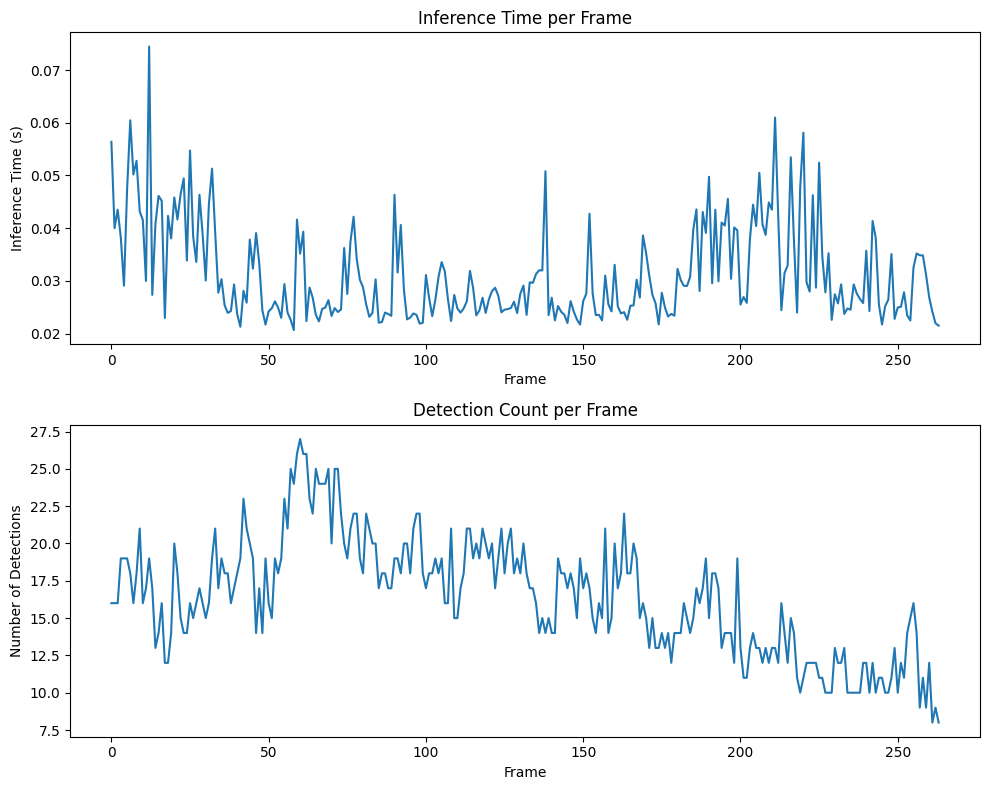

In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns

frame_times = []
detection_counts = []

# Process each frame and log metrics
cap = cv2.VideoCapture(video_path)
frame_count = 0
while cap.isOpened() and frame_count < 264:
    ret, frame = cap.read()
    if not ret:
        break
    frame_count += 1

    # Record start time
    start_time = time.time()

    # Perform inference
    results = model(frame)

    # Calculate and store inference time
    inference_time = time.time() - start_time
    frame_times.append(inference_time)

    # Count and store the number of detections
    detection_counts.append(len(results[0].boxes))

    # Display or process your frame here
    # ...

cap.release()

# Plot the collected metrics
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot inference times per frame
sns.lineplot(x=range(len(frame_times)), y=frame_times, ax=axs[0])
axs[0].set_title('Inference Time per Frame')
axs[0].set_xlabel('Frame')
axs[0].set_ylabel('Inference Time (s)')

# Plot detection counts per frame
sns.lineplot(x=range(len(detection_counts)), y=detection_counts, ax=axs[1])
axs[1].set_title('Detection Count per Frame')
axs[1].set_xlabel('Frame')
axs[1].set_ylabel('Number of Detections')

plt.tight_layout()
plt.show()
